Table of Contents:
1) Importing libraries
2) importing the cust_ords_prods_m.pkl'  and the regions file'Regions of USA1.csv'file
3) Merging the regions file to the cust_ord_prods_file.
3) creating Exclusion flags to form two datasets viz; df_retained and df_excluded
4) Creating Visualizations for various costumer profiles
5) Expoerting the visualizations to the visualizations folder.

In [1]:
#Importing Libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
#creating a path for importing a file
path = path = r'C:\Users\user\OneDrive\Documents\Instacart basket analysis Career foundry'

In [10]:
path

'C:\\Users\\user\\OneDrive\\Documents\\Instacart basket analysis Career foundry'

In [3]:
#Importing the files
cust_ords_prods = pd.read_pickle(os.path.join(path, '02 Data', 'prepared Data', 'cust_ords_prods_m.pkl'))

#DATA CITATION
"The Instacart Online Grocery Shopping Dataset 2017”, Accessed from https://www.instacart.com/datasets/grocery-shopping-2017 on [1/05/2022].
Do note that the customer data used in Exercises 4.9 and 4.10, as well as the “prices” column in the products data set, were both fabricated for the purpose of this course. 

In [4]:
#Importing the Regions file
state_reg = pd.read_csv(os.path.join(path, '02 Data', 'original data', 'Regions of USA 1.csv'),index_col = False)


In [11]:
#viewing the Dataframes. We have created a state and region file in Excel--->converted to .csv---->and imported it here.
state_reg

,state,region
0,Maine,Region1 Northeast
1,New Hampshire,Region1 Northeast
2,Vermont,Region1 Northeast
3,Massachusetts,Region1 Northeast
4,Rhode Island,Region1 Northeast
5,Connecticut,Region1 Northeast
6,New York,Region1 Northeast
7,Pennsylvania,Region1 Northeast
8,New Jersey,Region1 Northeast
9,Wisconsin,Region2 Midwest


In [12]:
cust_ords_prods.head() # the most updated file with customer information.

,user_id,first_name,surname,gender,state,age,date_joined,dependants,marital_status,income,...,price_range_loc,busiest day,busiest_period_of_day,max_order,loyalty_flag,mean_price,spending_flag,median_days_since_prior_ord,ord_frequency_flag,_merge
0,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Mid_range_products,Busiest days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,both
1,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Mid_range_products,Regularly busy,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,both
2,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Mid_range_products,Busiest days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,both
3,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Mid_range_products,Regularly busy,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,both
4,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Mid_range_products,Slowest days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,both


In [7]:
#Determining the shape of 'cust_ords_prods'
cust_ords_prods.shape

(32404859, 32)

In [5]:
#To get the Regions column in the main dataframe we shall merge the two dataframes on the key columnn'state'.
# But before we proceed we shall delete the '_merge' column from the 'cust_ords_prods' dataset.
del cust_ords_prods['_merge']


In [16]:
cust_ords_prods.head()

,user_id,first_name,surname,gender,state,age,date_joined,dependants,marital_status,income,...,prices,price_range_loc,busiest day,busiest_period_of_day,max_order,loyalty_flag,mean_price,spending_flag,median_days_since_prior_ord,ord_frequency_flag
0,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,9.0,Mid_range_products,Busiest days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer
1,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,9.0,Mid_range_products,Regularly busy,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer
2,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,9.0,Mid_range_products,Busiest days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer
3,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,12.6,Mid_range_products,Regularly busy,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer
4,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,12.6,Mid_range_products,Slowest days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer


In [18]:
#Determining Datatypes for the state and region dataframe
state_reg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   state   51 non-null     object
 1   region  51 non-null     object
dtypes: object(2)
memory usage: 944.0+ bytes


In [11]:
cust_ords_prods.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32404859 entries, 0 to 32404858
Data columns (total 31 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   user_id                      int32  
 1   first_name                   object 
 2   surname                      object 
 3   gender                       object 
 4   state                        object 
 5   age                          int8   
 6   date_joined                  object 
 7   dependants                   int8   
 8   marital_status               object 
 9   income                       int32  
 10  order_id                     int32  
 11  order_number                 int8   
 12  orders_day_of_week           int8   
 13  order_time_of_day            int8   
 14  days_since_prior_order       float16
 15  product_id                   int32  
 16  add_to_cart_order            int32  
 17  reordered                    int32  
 18  product_name                 object 
 19

In [6]:
# Merging the 2 dataframes onthe key column 'state'
custreg_ords_prods = cust_ords_prods.merge(state_reg, on = 'state', indicator=True)

In [8]:
custreg_ords_prods.head()

,user_id,first_name,surname,gender,state,age,date_joined,dependants,marital_status,income,...,busiest day,busiest_period_of_day,max_order,loyalty_flag,mean_price,spending_flag,median_days_since_prior_ord,ord_frequency_flag,region,_merge
0,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Busiest days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,Region2 Midwest,both
1,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Regularly busy,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,Region2 Midwest,both
2,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Busiest days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,Region2 Midwest,both
3,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Regularly busy,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,Region2 Midwest,both
4,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Slowest days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,Region2 Midwest,both


In [7]:
custreg_ords_prods['_merge'].value_counts(dropna=False) #confirming the merge

both          32404859
left_only            0
right_only           0
Name: _merge, dtype: int64

In [8]:
#Regionwise spending
custreg_ords_prods.groupby('region')['spending_flag'].value_counts(dropna=False)

region             spending_flag
Region1 Northeast  Low spender       5614511
                   High spender       108225
Region2 Midwest    Low spender       7441350
                   High spender       155975
Region3 South      Low spender      10582194
                   High spender       209691
Region4 West       Low spender       8132559
                   High spender       160354
Name: spending_flag, dtype: int64

In [19]:
custreg_ords_prods.groupby('region')['mean_price'].mean()

region
Region1 Northeast    11.554997
Region2 Midwest      12.715483
Region3 South        12.195577
Region4 West         11.319834
Name: mean_price, dtype: float64

#Analysis of spending habits across region.
 - it appears that spending pattern does not vary with region.
 - as is evident from the regional groupby output around 98 % of the purchases fall in the low spender category across all regions .
 - Only 2% purchases across all regions fall in the high spender category.
 - Hence, it can be said that spending habits do not vary with the region.
 - This is also conformed by the mean purchase price across each region which does not show any drastic difference from one-another.

In [9]:
pd.options.display.max_columns = None

In [10]:
custreg_ords_prods.loc[custreg_ords_prods['max_order'] < 5, 'exclusion_flag'] = 'Exclude'  #Exclude the cudtomer with orders<5

custreg_ords_prods.loc[custreg_ords_prods['max_order'] >= 5, 'exclusion_flag'] = 'Retain'  #Retain customers with orders >5

In [12]:
custreg_ords_prods.head()

,user_id,first_name,surname,gender,state,age,date_joined,dependants,marital_status,income,order_id,order_number,orders_day_of_week,order_time_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,busiest day,busiest_period_of_day,max_order,loyalty_flag,mean_price,spending_flag,median_days_since_prior_ord,ord_frequency_flag,region,_merge,exclusion_flag
0,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,2543867,5,1,9,30.0,196,2,0,Soda,77,7,9.0,Mid_range_products,Busiest days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,Region2 Midwest,both,Retain
1,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,1285508,7,5,15,11.0,196,1,1,Soda,77,7,9.0,Mid_range_products,Regularly busy,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,Region2 Midwest,both,Retain
2,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,2578584,8,1,15,10.0,196,2,1,Soda,77,7,9.0,Mid_range_products,Busiest days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,Region2 Midwest,both,Retain
3,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,423547,2,2,9,14.0,38928,1,0,0% Greek Strained Yogurt,120,16,12.6,Mid_range_products,Regularly busy,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,Region2 Midwest,both,Retain
4,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,2524893,3,3,11,30.0,38928,1,1,0% Greek Strained Yogurt,120,16,12.6,Mid_range_products,Slowest days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,Region2 Midwest,both,Retain


In [12]:
del custreg_ords_prods['_merge']

#Create a dataframe containing excluded customers

In [13]:
df_exc = custreg_ords_prods[custreg_ords_prods['exclusion_flag'] == 'Exclude'] 

In [28]:
df_exc #dataframe containing 'excluded' customers information.

,user_id,first_name,surname,gender,state,age,date_joined,dependants,marital_status,income,order_id,order_number,orders_day_of_week,order_time_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,busiest day,busiest_period_of_day,max_order,loyalty_flag,mean_price,spending_flag,median_days_since_prior_ord,ord_frequency_flag,region,exclusion_flag
727,144623,Philip,Duran,Male,Missouri,38,1/1/2017,2,married,62855,124702,3,1,19,30.0,21137,4,0,Organic Strawberries,24,4,7.3,Mid_range_products,Busiest days,Average orders,4,New customer,7.540909,Low spender,22.5,Non frequent customer,Region2 Midwest,Exclude
728,144623,Philip,Duran,Male,Missouri,38,1/1/2017,2,married,62855,1143778,4,1,15,30.0,42265,5,0,Organic Baby Carrots,123,4,11.8,Mid_range_products,Busiest days,Most orders,4,New customer,7.540909,Low spender,22.5,Non frequent customer,Region2 Midwest,Exclude
729,144623,Philip,Duran,Male,Missouri,38,1/1/2017,2,married,62855,124702,3,1,19,30.0,11777,3,0,Red Raspberries,123,4,10.5,Mid_range_products,Busiest days,Average orders,4,New customer,7.540909,Low spender,22.5,Non frequent customer,Region2 Midwest,Exclude
730,144623,Philip,Duran,Male,Missouri,38,1/1/2017,2,married,62855,1143778,4,1,15,30.0,24535,2,0,Plain Whole Milk Yogurt,120,16,8.0,Mid_range_products,Busiest days,Most orders,4,New customer,7.540909,Low spender,22.5,Non frequent customer,Region2 Midwest,Exclude
731,144623,Philip,Duran,Male,Missouri,38,1/1/2017,2,married,62855,124702,3,1,19,30.0,6141,2,0,Low Sodium Beef Broth,69,15,6.6,Mid_range_products,Busiest days,Average orders,4,New customer,7.540909,Low spender,22.5,Non frequent customer,Region2 Midwest,Exclude
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32404409,79874,Willie,Wyatt,Male,Delaware,49,4/1/2020,1,married,130941,1233525,2,0,12,10.0,22418,1,1,Imitation Crab Sticks,15,12,21.9,High_range_products,Busiest days,Most orders,3,New customer,7.896296,Low spender,10.0,Frequent customer,Region3 South,Exclude
32404410,79874,Willie,Wyatt,Male,Delaware,49,4/1/2020,1,married,130941,3118274,1,4,16,0.0,3042,5,0,S. Pellegrino Sparkling Natural Mineral Water,115,7,2.6,Low_range_products,Slowest days,Most orders,3,New customer,7.896296,Low spender,10.0,Frequent customer,Region3 South,Exclude
32404411,79874,Willie,Wyatt,Male,Delaware,49,4/1/2020,1,married,130941,1233525,2,0,12,10.0,3042,5,1,S. Pellegrino Sparkling Natural Mineral Water,115,7,2.6,Low_range_products,Busiest days,Most orders,3,New customer,7.896296,Low spender,10.0,Frequent customer,Region3 South,Exclude
32404412,79874,Willie,Wyatt,Male,Delaware,49,4/1/2020,1,married,130941,196104,3,2,10,30.0,48957,13,0,Milk Free Better Than Sour Cream,108,16,11.9,Mid_range_products,Regularly busy,Most orders,3,New customer,7.896296,Low spender,10.0,Frequent customer,Region3 South,Exclude


In [14]:
# DATAFRAME CONTAINING INFORMATION ABOUT RETAINED CUSTOMERS WHO HAVE PLACED MORE THAN 5 ORDERS
df_retained = custreg_ords_prods[custreg_ords_prods['exclusion_flag'] == 'Retain']

In [32]:
df_retained

,user_id,first_name,surname,gender,state,age,date_joined,dependants,marital_status,income,order_id,order_number,orders_day_of_week,order_time_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,busiest day,busiest_period_of_day,max_order,loyalty_flag,mean_price,spending_flag,median_days_since_prior_ord,ord_frequency_flag,region,exclusion_flag
0,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,2543867,5,1,9,30.0,196,2,0,Soda,77,7,9.0,Mid_range_products,Busiest days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,Region2 Midwest,Retain
1,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,1285508,7,5,15,11.0,196,1,1,Soda,77,7,9.0,Mid_range_products,Regularly busy,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,Region2 Midwest,Retain
2,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,2578584,8,1,15,10.0,196,2,1,Soda,77,7,9.0,Mid_range_products,Busiest days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,Region2 Midwest,Retain
3,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,423547,2,2,9,14.0,38928,1,0,0% Greek Strained Yogurt,120,16,12.6,Mid_range_products,Regularly busy,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,Region2 Midwest,Retain
4,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,2524893,3,3,11,30.0,38928,1,1,0% Greek Strained Yogurt,120,16,12.6,Mid_range_products,Slowest days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,Region2 Midwest,Retain
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32404854,99254,Lori,Watts,Female,Delaware,75,4/1/2020,1,married,156966,1198602,25,0,11,6.0,42499,4,0,Sauce,72,13,10.0,Mid_range_products,Busiest days,Most orders,56,Loyal customer,7.794607,Low spender,6.0,Frequent customer,Region3 South,Retain
32404855,99254,Lori,Watts,Female,Delaware,75,4/1/2020,1,married,156966,812541,18,6,18,6.0,11789,4,0,Gluten Free Verde Sauce,89,13,14.1,Mid_range_products,Regularly busy,Average orders,56,Loyal customer,7.794607,Low spender,6.0,Frequent customer,Region3 South,Retain
32404856,99254,Lori,Watts,Female,Delaware,75,4/1/2020,1,married,156966,1848245,50,3,17,3.0,11789,1,1,Gluten Free Verde Sauce,89,13,14.1,Mid_range_products,Slowest days,Average orders,56,Loyal customer,7.794607,Low spender,6.0,Frequent customer,Region3 South,Retain
32404857,99254,Lori,Watts,Female,Delaware,75,4/1/2020,1,married,156966,626751,23,4,11,5.0,48072,1,0,Spinach Dip Mix,51,13,13.5,Mid_range_products,Slowest days,Most orders,56,Loyal customer,7.794607,Low spender,6.0,Frequent customer,Region3 South,Retain


In [33]:
#Exporting the Retained dataframe
df_retained.to_pickle(os.path.join(path, '02 Data','prepared Data', 'cust_ords_prods_retained.pkl'))

In [34]:
#Exporting the Excluded dataframe
df_exc.to_pickle(os.path.join(path, '02 Data','prepared Data', 'cust_ords_prods_excluded.pkl'))

#STEP 5: Creating customer profiles

In [17]:
#AGE PROFILE
df_retained['age'].value_counts(dropna=False).sort_index()

18    478457
19    496077
20    480194
21    489116
22    490811
       ...  
77    477999
78    471119
79    508337
80    492750
81    485847
Name: age, Length: 64, dtype: int64

In [18]:
#Determining the age descriptive statistics
df_retained['age'].describe()

count    3.096456e+07
mean     4.946803e+01
std      1.848528e+01
min      1.800000e+01
25%      3.300000e+01
50%      4.900000e+01
75%      6.500000e+01
max      8.100000e+01
Name: age, dtype: float64

In [19]:
# mean age = 49 yrs
# minimum age = 18 yrs
# maximum age = 81 yrs

In [26]:
# Creating an 'age_group' column.
df_retained.loc[(df_retained['age'] >= 18) & (df_retained['age'] <= 25), 'age_group'] = '18 - 25'
df_retained.loc[(df_retained['age'] >= 26) & (df_retained['age'] <= 35), 'age_group'] = '26 - 35'
df_retained.loc[(df_retained['age'] >= 36) & (df_retained['age'] <= 45), 'age_group'] = '36 - 45'
df_retained.loc[(df_retained['age'] >= 46) & (df_retained['age'] <= 55), 'age_group'] = '46 - 55'
df_retained.loc[(df_retained['age'] >= 56) & (df_retained['age'] <= 65), 'age_group'] = '56 - 65'
df_retained.loc[(df_retained['age'] >= 66) & (df_retained['age'] <= 75), 'age_group'] = '66 - 75'
df_retained.loc[(df_retained['age'] >= 77) & (df_retained['age'] <= 85), 'age_group'] = '76 - 85'


In [27]:
df_retained.head()

,user_id,first_name,surname,gender,state,age,date_joined,dependants,marital_status,income,order_id,order_number,orders_day_of_week,order_time_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,busiest day,busiest_period_of_day,max_order,loyalty_flag,mean_price,spending_flag,median_days_since_prior_ord,ord_frequency_flag,region,exclusion_flag,age_group
0,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,2543867,5,1,9,30.0,196,2,0,Soda,77,7,9.0,Mid_range_products,Busiest days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,Region2 Midwest,Retain,46 - 55
1,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,1285508,7,5,15,11.0,196,1,1,Soda,77,7,9.0,Mid_range_products,Regularly busy,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,Region2 Midwest,Retain,46 - 55
2,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,2578584,8,1,15,10.0,196,2,1,Soda,77,7,9.0,Mid_range_products,Busiest days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,Region2 Midwest,Retain,46 - 55
3,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,423547,2,2,9,14.0,38928,1,0,0% Greek Strained Yogurt,120,16,12.6,Mid_range_products,Regularly busy,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,Region2 Midwest,Retain,46 - 55
4,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,2524893,3,3,11,30.0,38928,1,1,0% Greek Strained Yogurt,120,16,12.6,Mid_range_products,Slowest days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,Region2 Midwest,Retain,46 - 55


In [30]:
df_age = df_retained['age_group'].value_counts().sort_index()

In [31]:
df_age #age profile dataframe

18 - 25    3864518
26 - 35    4874287
36 - 45    4828252
46 - 55    4889209
56 - 65    4777464
66 - 75    4817434
76 - 85    2436052
Name: age_group, dtype: int64

#Creating an income profile dataframe

In [32]:
df_retained['income'].describe()

count    3.096456e+07
mean     9.967587e+04
std      4.314187e+04
min      2.590300e+04
25%      6.729200e+04
50%      9.676500e+04
75%      1.281020e+05
max      5.939010e+05
Name: income, dtype: float64

In [33]:
#Income statistics of instacart customers
# minimum income = 25903
# Maximum income = 593901
# Mean income = 99675

In [34]:
#creating an income profile column = 'income bracket'
df_retained.loc[(df_retained['income'] >= 25000) & (df_retained['income'] <= 50000), 'income_bracket'] = '25000 - 50000'
df_retained.loc[(df_retained['income'] > 50000 ) & (df_retained['income'] <= 75000), 'income_bracket'] = '50000 - 75000'
df_retained.loc[(df_retained['income'] > 75000) & (df_retained['income'] <= 100000), 'income_bracket'] = '75000 - 100000'
df_retained.loc[(df_retained['income'] > 100000) & (df_retained['income'] <= 150000), 'income_bracket'] = '100000 - 150000'
df_retained.loc[(df_retained['income'] > 150000) & (df_retained['income'] <= 200000), 'income_bracket'] = '150000 - 200000'
df_retained.loc[(df_retained['income'] > 200000) & (df_retained['income'] <= 300000), 'income_bracket'] = '200000 - 300000'
df_retained.loc[(df_retained['income'] > 300000) & (df_retained['income'] <= 400000), 'income_bracket'] = '300000 - 400000'
df_retained.loc[(df_retained['income'] > 400000) & (df_retained['income'] <= 500000), 'income_bracket'] = '400000 - 500000'
df_retained.loc[(df_retained['income'] > 500000) & (df_retained['income'] <= 600000), 'income_bracket'] = '500000 - 600000'


C:\Users\user\AppData\Local\Temp\ipykernel_11368\355067477.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_retained.loc[(df_retained['income'] >= 25000) & (df_retained['income'] <= 50000), 'income_bracket'] = '25000 - 50000'


In [40]:
df_income = df_retained['income_bracket'].value_counts()

In [41]:
#income_profile dataframe
df_income 

100000 - 150000    10312494
75000 - 100000      6850802
50000 - 75000       6544180
150000 - 200000     3640392
25000 - 50000       3362554
200000 - 300000      154113
300000 - 400000       53033
400000 - 500000       27927
500000 - 600000       19069
Name: income_bracket, dtype: int64

In [58]:
pd.options.display.max_rows = None

#creating 'Goods_profile'

In [66]:
df_retained['department_id'].value_counts().sort_index()

1     2121731
2       34411
3     1120828
4     9079273
5      144627
6      255991
7     2571901
8       93060
9      822136
10      33451
11     424306
12     674781
13    1782705
14     670850
15    1012074
16    5177182
17     699857
18     410392
19    2766406
20    1003834
21      64768
Name: department_id, dtype: int64

In [15]:
#creating a 'goods' column
df_retained.loc[(df_retained['department_id'] == 1), 'goods_category'] = 'frozen'
df_retained.loc[(df_retained['department_id'] == 2), 'goods_category'] = 'other'
df_retained.loc[(df_retained['department_id'] == 3), 'goods_category'] = 'bakery'
df_retained.loc[(df_retained['department_id'] == 4), 'goods_category'] = 'produce'
df_retained.loc[(df_retained['department_id'] == 5), 'goods_category'] = 'alcohol'
df_retained.loc[(df_retained['department_id'] == 6), 'goods_category'] = 'international'
df_retained.loc[(df_retained['department_id'] == 7), 'goods_category'] = 'beverages'
df_retained.loc[(df_retained['department_id'] == 8), 'goods_category'] = 'pets'
df_retained.loc[(df_retained['department_id'] == 9), 'goods_category'] = 'dry goods pasta'
df_retained.loc[(df_retained['department_id'] == 10), 'goods_category'] = 'bulk'
df_retained.loc[(df_retained['department_id'] == 11), 'goods_category'] = 'personal care'
df_retained.loc[(df_retained['department_id'] == 12), 'goods_category'] = 'meat seafood'
df_retained.loc[(df_retained['department_id'] == 13), 'goods_category'] = 'pantry'
df_retained.loc[(df_retained['department_id'] == 14), 'goods_category'] = 'breakfast'
df_retained.loc[(df_retained['department_id'] == 15), 'goods_category'] = 'canned goods'
df_retained.loc[(df_retained['department_id'] == 16), 'goods_category'] = 'dairy eggs'
df_retained.loc[(df_retained['department_id'] == 17), 'goods_category'] = 'household'
df_retained.loc[(df_retained['department_id'] == 18), 'goods_category'] = 'babies'
df_retained.loc[(df_retained['department_id'] == 19), 'goods_category'] = 'snacks'
df_retained.loc[(df_retained['department_id'] == 20), 'goods_category'] = 'deli'
df_retained.loc[(df_retained['department_id'] == 21), 'goods_category'] = 'missing'

C:\Users\user\AppData\Local\Temp\ipykernel_5672\3314928635.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_retained.loc[(df_retained['department_id'] == 1), 'goods_category'] = 'frozen'


In [16]:
df_goods = df_retained['goods_category'].value_counts()

In [71]:
df_goods # dataframe of goods profile

produce            9079273
dairy eggs         5177182
snacks             2766406
beverages          2571901
frozen             2121731
pantry             1782705
bakery             1120828
canned goods       1012074
deli               1003834
dry goods pasta     822136
household           699857
meat seafood        674781
breakfast           670850
personal care       424306
babies              410392
international       255991
alcohol             144627
pets                 93060
missing              64768
other                34411
bulk                 33451
Name: goods_category, dtype: int64

In [17]:
fam_dep= pd.crosstab(df_retained['marital_status'], df_retained['goods_category'], dropna = False)

#Creating a Family profile

In [50]:
df_retained['dependants'].value_counts(dropna = False)

3    7772516
0    7739681
2    7733261
1    7719106
Name: dependants, dtype: int64

In [52]:
# creating a "family_status" column
df_retained.loc[(df_retained['dependants'] == 0), 'family_status'] = 'single'
df_retained.loc[(df_retained['dependants'] >= 1), 'family_status'] = 'family'

C:\Users\user\AppData\Local\Temp\ipykernel_11368\1568395788.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_retained.loc[(df_retained['dependants'] == 0), 'family_status'] = 'single'


In [54]:
#creating a dataframe containing family status
df_family = df_retained['family_status'].value_counts()

In [55]:
df_family

family    23224883
single     7739681
Name: family_status, dtype: int64

In [56]:
#creating a marital_status profile
df_marital = df_retained['marital_status'].value_counts()

In [57]:
df_marital #Dataframe of marital_status

married                             21743711
single                               5094410
divorced/widowed                     2645271
living with parents and siblings     1481172
Name: marital_status, dtype: int64

# Step 6:Creating visualizations

In [72]:
#1 Age profile visualization
df_age

18 - 25    3864518
26 - 35    4874287
36 - 45    4828252
46 - 55    4889209
56 - 65    4777464
66 - 75    4817434
76 - 85    2436052
Name: age_group, dtype: int64

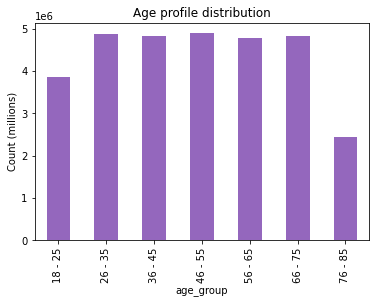

In [73]:
age_chart = df_age.plot.bar(color = 'tab:purple', xlabel = 'age_group', ylabel = 'Count (millions)', title = 'Age profile distribution')

In [95]:
# Exporting chart to visualization folder
age_chart.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'age_profile_distribution.png'))

In [74]:
#2 income_profile dataframe
df_income

100000 - 150000    10312494
75000 - 100000      6850802
50000 - 75000       6544180
150000 - 200000     3640392
25000 - 50000       3362554
200000 - 300000      154113
300000 - 400000       53033
400000 - 500000       27927
500000 - 600000       19069
Name: income_bracket, dtype: int64

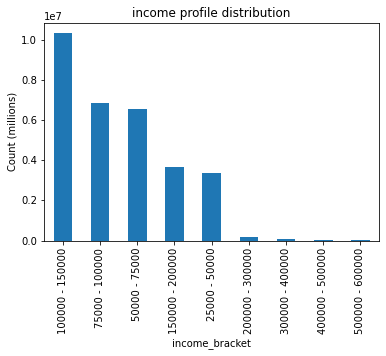

In [76]:
income_chart = df_income.plot.bar(color = 'tab:blue', xlabel = 'income_bracket', ylabel = 'Count (millions)', title = 'income profile distribution')

In [96]:
# Exporting chart to visualization folder
income_chart.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'income_profile_distribution.png'))

In [77]:
#3 Goods profile distribution
df_goods

produce            9079273
dairy eggs         5177182
snacks             2766406
beverages          2571901
frozen             2121731
pantry             1782705
bakery             1120828
canned goods       1012074
deli               1003834
dry goods pasta     822136
household           699857
meat seafood        674781
breakfast           670850
personal care       424306
babies              410392
international       255991
alcohol             144627
pets                 93060
missing              64768
other                34411
bulk                 33451
Name: goods_category, dtype: int64

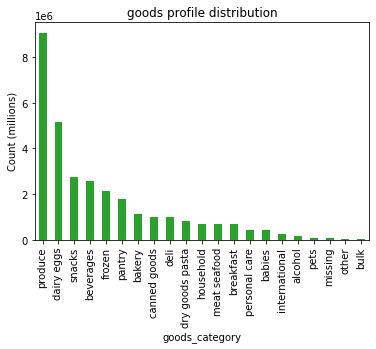

In [78]:
Goods_chart = df_goods.plot.bar(color = 'tab:green', xlabel = 'goods_category', ylabel = 'Count (millions)', title = 'goods profile distribution')

In [97]:
# Exporting chart to visualization folder
Goods_chart.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'goods_profile_distribution.png'))

In [79]:
#4 Family status Profile of instacart customers
df_family

family    23224883
single     7739681
Name: family_status, dtype: int64

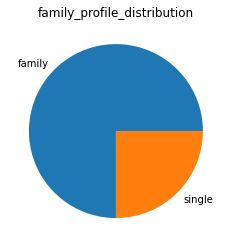

In [80]:
family_chart = df_family.plot.pie(title = 'family_profile_distribution', ylabel='')

In [98]:
# Exporting chart to visualization folder
family_chart.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'family_profile_distribution.png'))

In [81]:
#5 Marital status profile
df_marital

married                             21743711
single                               5094410
divorced/widowed                     2645271
living with parents and siblings     1481172
Name: marital_status, dtype: int64

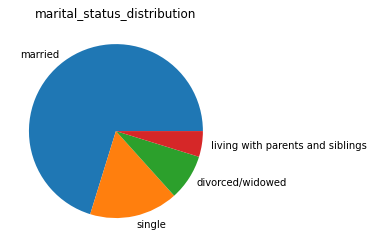

In [82]:
marital_chart = df_marital.plot.pie(title = 'marital_status_distribution', ylabel='')

In [99]:
# Exporting chart to visualization folder
marital_chart.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'marital_profile_distribution.png'))

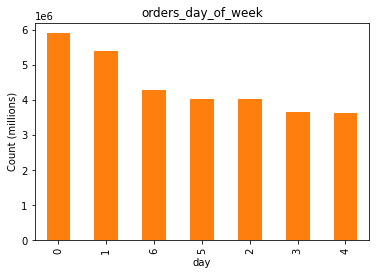

In [85]:
#6 order day of the week profile
order_day_chart = df_retained['orders_day_of_week'].value_counts().plot.bar(color = 'tab:orange', xlabel = 'day', ylabel = 'Count (millions)', title = 'orders_day_of_week')

In [100]:
# Exporting chart to visualization folder
order_day_chart.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'salesbyday_distribution.png'))

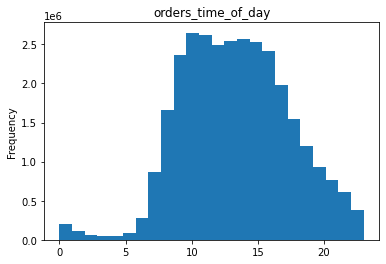

In [87]:
#7 orders hour of day profile
sales_hod_hist = df_retained['order_time_of_day'].plot.hist(color = 'tab:blue', xlabel = 'hour', ylabel = 'count (millions)', bins = 24, title = 'orders_time_of_day')

In [101]:
# Exporting chart to visualization folder
sales_hod_hist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'salesby_hour_distribution.png'))

# STEP 8: Costumer profiles across regions and departments 

In [91]:
# customer profiles across regions
df_region_spending = pd.crosstab(df_retained['region'], df_retained['spending_flag'], dropna = False)


In [93]:
df_region_spending

spending_flag,High spender,Low spender
region,,
Region1 Northeast,103120,5361565
Region2 Midwest,148678,7112835
Region3 South,199339,10111800
Region4 West,152288,7774939


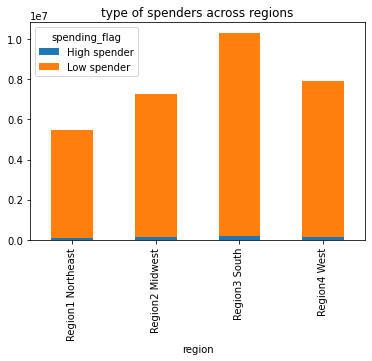

In [94]:
df_spending_chart = df_region_spending.plot.bar(stacked = True, title = 'type of spenders across regions')

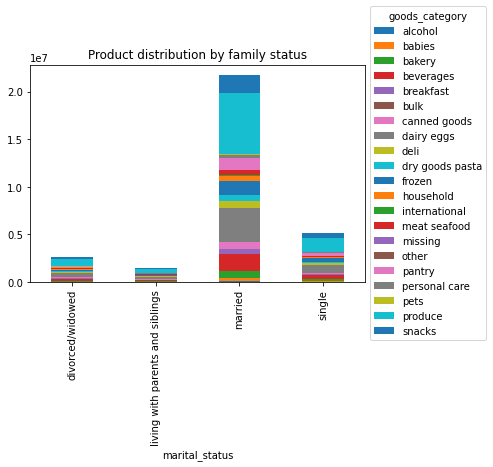

In [20]:
df_fam_prod = fam_dep.plot.bar(stacked = True, title = 'Product distribution by family status')
df_fam_prod.legend(title='goods_category',bbox_to_anchor=(1,0.5),loc = 'center left')


In [21]:
# Exporting chart to visualization folder
df_fam_prod.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'product_distribution_by_family.png'))

In [104]:
# customer departmental profile across regions
df_region_department= pd.crosstab(df_retained['region'], df_retained['goods_category'], dropna = False)


In [105]:
df_region_department

goods_category,alcohol,babies,bakery,beverages,breakfast,bulk,canned goods,dairy eggs,deli,dry goods pasta,frozen,household,international,meat seafood,missing,other,pantry,personal care,pets,produce,snacks
region,,,,,,,,,,,,,,,,,,,,,
Region1 Northeast,25017,72712,199300,462929,117904,5599,176936,914616,178398,143817,370436,124604,44678,118571,11512,6268,312731,74765,17734,1593004,493154
Region2 Midwest,34043,95741,261753,598979,156155,7929,237459,1212490,234464,193463,498225,166992,60666,158260,15563,7983,420334,100398,21358,2134115,645143
Region3 South,48813,139511,371620,859419,223172,11180,337458,1723016,333620,272813,709906,230061,84649,224120,21787,11579,591754,142496,29909,3027476,916780
Region4 West,36754,102428,288155,650574,173619,8743,260221,1327060,257352,212043,543164,178200,65998,173830,15906,8581,457886,106647,24059,2324678,711329


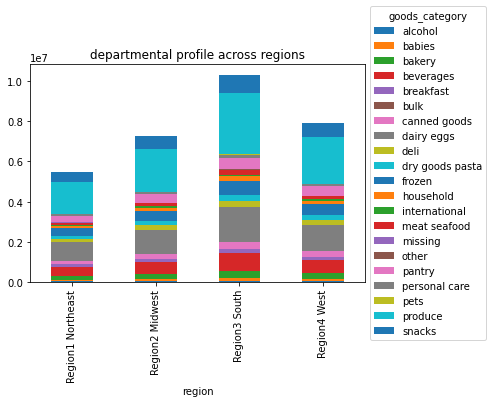

In [109]:
df_reg_dep_chart = df_region_department.plot.bar(stacked = True, title = 'departmental profile across regions')
df_reg_dep_chart.legend(title='goods_category',bbox_to_anchor=(1,0.5),loc = 'center left')

In [110]:
# Exporting chart to visualization folder
df_reg_dep_chart.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'departments_byregion_distribution1.png'))